# Predict the sale price of product based on investment in three different media channels

# Step 1 . Import dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Step 2 : Import data 

In [2]:
df = pd.read_csv(r'Advertising.csv', index_col = 0)
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Step 3. Data analysis

In [3]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


> In this data we can see that we have spend more amount on TV media channel 

> Less amount on radio media chanel 


# Step 4 . Check Assumption 
Linear regression is a parametric algorthim means before using linear regression 
we have to check the assumption if those assumtions are true then only 
we can use linear regresssion other wise use other algo

In [5]:
Assumption 1 . There should be no outliers in data 

SyntaxError: invalid syntax (3625511307.py, line 1)

In [ ]:
df.boxplot() # box plot is use for continous numeric data

In [ ]:
df.boxplot(column="newspaper")

# Note : if outlier present then we can treat using below approach
    
> Elimination : directly dropping the variable

>Treat the outlier : A using caping and floaring approach
                   : Replace using measure of central tendencies
                   : replace custom values
                   

>If cluster is present then leave them as it is ( more data)

> check with client if this is acceptable range or not

In [ ]:
df.isnull().sum()  #is null means we to check : and sum is used to see total missing value.

In [ ]:
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame 
    return: Missing value data frame 

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascendi ng=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="magma" )

Note:
    
    1. If Missing value contain more than 50% of the data then you can drop the entire column
    2. if less than 50% then we can treat those missing values by using Measure of Central Tendencies
    3. If column is Categorial then you can use Mode to replace missing values
    4. If column is Continuous Numerical Varaiable then you can you use Mean if that variable is not skewd
    5. if column is continuous numerical varaiable with skewd data then we can use Median which is not affected by outlier
    6. You can Predict the missing values by using Other featreus (not recommended)
    7. You can directly ask to client
    8. Common Sence

# Assumption 2. Assumption of Lineartiy: Every Independet Variable should have a Linear Relationship with the Dependent Variable.


means we have to check whether there is relation between x and y variable it can be positive , negative 
if the there is no relation between the x and y variable then we can drop the variable.

In [ ]:
# to check the relation we use pairplot

In [ ]:
sns.pairplot(df,
             x_vars=["TV","radio","newspaper"],
             y_vars="sales",
             kind='reg')
plt.show()

# Note: If the assumption of Linearity is not met then we can drop that variable

- Strong Positive Linear Relationship in Tv and sales
- Moderately Strong Positive Linear Relationship in Radio and sales
- NO Relation in Newspaper Sales also the C.I is also high  

In [ ]:
df.columns

In [10]:
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols] # here X is bigger because the data is in 2d
y = df.sales         # here y is small because the data is 1d

In [11]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

# Assumption 3: Assumption of Normality: The dependent Variable should follow an approximate normal Distribution

In linear regression the data should be normally distributed so that the predication can be made properly.




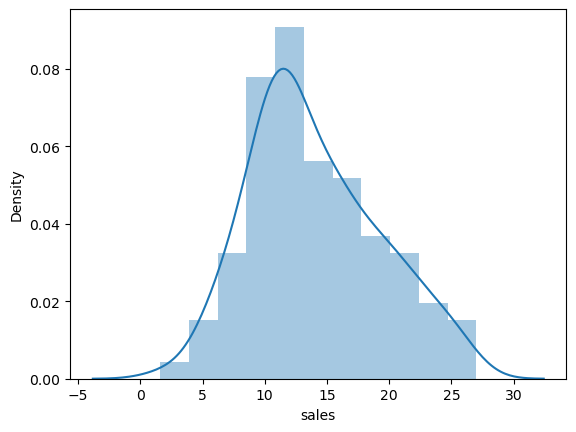

In [13]:
sns.distplot(y, hist=True)  # this is distrubtion plot
plt.show()

- SALE Variable is meeting the assumption and we can see the approximate normal Distribution


### Note: If its not normal or if its skewed plot then we can transform the column in different transformation

1. Log Transform
    - Most of the time We Prefer log transform, because it will help you to smoothing of curve 
2. SQRT Transform
    - In sqrt transform we can see the peeks and sometime it will not help you to smoothing of curve

<Axes: xlabel='sales', ylabel='Density'>

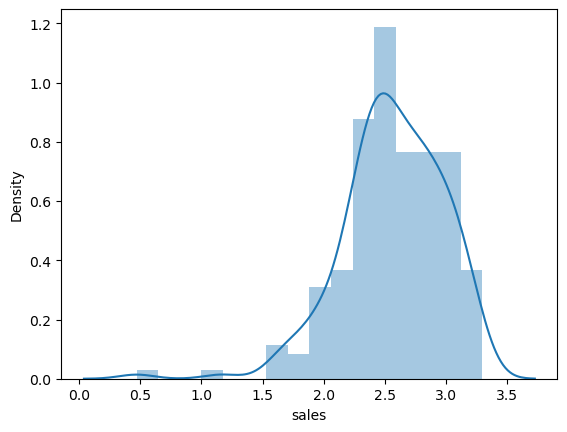

In [14]:
#### you can use this code to convert into log transformation
Y_log = np.log(y)
sns.distplot(Y_log, hist=True)

#### Note: If your data is approximate normal then dont transform coz you will get skewd data

#### Note: For good practive make sure that your X variables does not contain high skewness and if its approximately normal then its good.


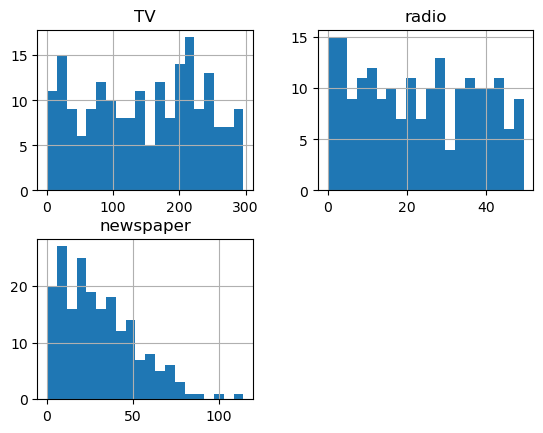

In [16]:
# check hist for all variables
X.hist(bins=20)
plt.show()

In [15]:
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [ ]:
data_num_skewed.index

In [ ]:
X[data_num_skewed.index]

In [17]:
# apply log + 1 transformation for all numeric featreus with Skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

- Range of skewness is -1 to +1 and value close to 0 means normal distribution

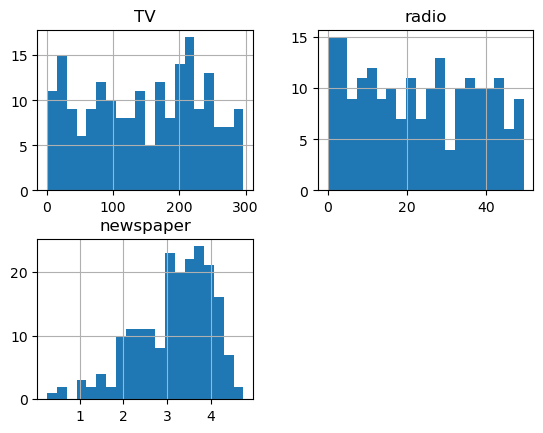

In [18]:
# check hist for all variables after log transform of newspaper 
X.hist(bins=20)
plt.show()

Assumption 4 : There should be no multicolinearity in Data 

    Multicolinearity is problem where one variable is dependent on other , we want dependency between x and y variable but not in the X variable, so if varaible are depend on each other then the model will bw not good
    to check the multicolinearity we can use the pearson correlation or VIF value.

Pearson Corrleration 

In [19]:
corr_df = X.corr(method ="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


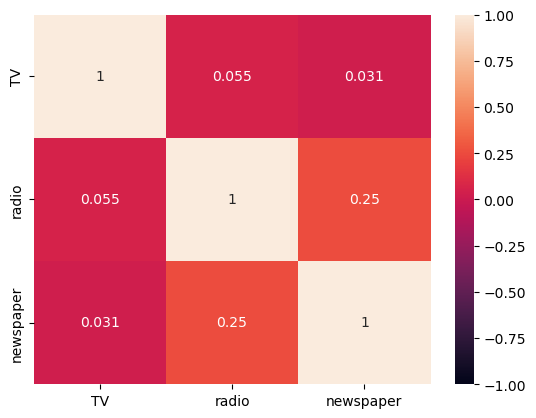

In [20]:
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True)
plt.show()

we want value close to 0 means that  is not correlated with each other 
#### Note: If the correlation is high between two variables then drop one 
beacuse bothe varible carrying the similar information so eliminate the varible but think logically.

# Check VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [22]:
vif_df = pd.DataFrame()
vif_df["Features"] = X.columns
vif_df["VIF Factors"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,Features,VIF Factors
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [23]:
all_scores = []
for i in range(X.shape[1]):
    v = vif(X.values, i)
    all_scores.append(round(v, 2))
vif_df["VIF Factors"] = all_scores


In [24]:
all_scores

[3.39, 3.63, 5.44]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.2,
                                                    random_state=10)

In [27]:
df.shape

(200, 4)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [30]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [31]:
X_train_scale

array([[0.12110845, 0.82758621, 0.36910949],
       [0.39719466, 0.39148073, 0.50670344],
       [0.4748546 , 0.58823529, 0.52374121],
       [0.13308245, 0.51926978, 0.62591103],
       [0.70715019, 1.        , 0.75703825],
       [0.07765994, 0.663286  , 0.61309872],
       [0.62880602, 0.34279919, 0.5971572 ],
       [0.78002053, 0.168357  , 0.44835052],
       [0.01094766, 0.56389452, 0.777408  ],
       [0.46219637, 0.28397566, 0.67339682],
       [0.1991105 , 0.2494929 , 0.60182933],
       [0.69380773, 0.1643002 , 0.68000727],
       [1.        , 0.73022312, 0.97301989],
       [0.54533014, 0.74036511, 0.41624968],
       [0.79815258, 0.09736308, 0.65505062],
       [0.16900445, 0.03448276, 0.63505936],
       [0.93328772, 0.98580122, 0.77950272],
       [0.66712282, 0.61460446, 0.76272954],
       [0.44543277, 0.09330629, 0.46173972],
       [0.21484776, 0.23123732, 0.75178892],
       [0.05234348, 0.31845842, 0.64384727],
       [0.75846733, 0.16024341, 0.84536828],
       [0.

# Model Building 

In [32]:
from sklearn.linear_model import LinearRegression



lm = LinearRegression()

lm.fit(X_train_scale, y_train)


LinearRegression()

In [33]:
#print intercept and coefficients

print(lm.intercept_)
print(lm.coef_)


3.577703676256254
[12.78593321  9.51672799 -0.21942783]


In [34]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [35]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 12.785933211080348), ('radio', 9.51672799339122), ('newspaper', -0.21942783008785402)]


In [36]:
# try chaging the value of X 
600
X1=0 # tv
X2=0 # radio
X3=0 # newspaper
y_pred_single_data=3.577703676256249+(12.78593321 * X1)+(9.516727993391225 * X2)+(-0.219427830*X3)
print(y_pred_single_data)

3.577703676256249


In [37]:
# X_test_scale

y_pred = lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [38]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = y_pred
new_df["Error"] = abs(new_df["Actual Sales"] - new_df["Predicted Sales"])
# new_df

In [40]:
from sklearn.metrics import r2_score, mean_squared_error  # https://justpaste.it/etigm
import numpy as np

r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R Square:  0.834801071903532
Adjusted R Square:  0.8322725168816474
RMSE:  2.59297691109306


In [39]:
print(min(y))
print(max(y))      

1.6
27.0


In [41]:
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Error,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,5.761369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,0.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490,1.912490
